# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Understanding Data

In [2]:
df = pd.read_csv(r"F:\D\corona\Sales_Prediction\TRAIN.csv", parse_dates=['Date'])

def understanding_data(data):
    
    # Shape of the data
    print('\n')
    print(f"Shape Of The Data: {data.shape}")
    print(f"Number Of The Rows: {data.shape[0]}")
    print(f"Number Of The Columns: {data.shape[1]}\n")
    print('-'*80)
    
    # Checking Data Type
    print('\n')
    print("Data Type Of All The Columns:")
    print('\n')
    print(data.info())
    print('\n')
    print('-'*80)
    
    # Understanding The Numerical & Non-Numerical Data    
    print('\n')
    numerical_data = data.select_dtypes(include=[np.number])
    non_numerical_data = data.select_dtypes(exclude=[np.number])
    
    print('\n')
    print(f"Number Of Numerical Features: {numerical_data.shape[1]}\n")
    print(f"All Numerical Features: {numerical_data.columns}\n")
    print('-'*80)
    print('\n')
    print(f"Number Of Non-Numerical Features: {non_numerical_data.shape[1]}\n")
    print(f"All Non-Numerical Features: {non_numerical_data.columns}\n")
    print('-'*80)
    print('\n')
    
    # Null Values Presents In The Data
    print('\n')
    print("Null Values Presents In The Dataset:\n")
    print(data.isna().sum())
    print('\n')
    print(f"Total Missing Values In DataFrame: {data.isnull().sum().sum()}")
    print('\n')
    print(f"List Of All The Columns Which Has Null Values: {df.columns[df.isnull().any()].tolist()}")
    print('\n')
    print(f"Total Count Of Columns Which Has Null Values: {len(df.columns[df.isnull().any()].tolist())}")
    print('\n')
    num = pd.DataFrame(numerical_data)
    print(f"List Of All The Numerical Columns Which Has Null Values: {num.columns[num.isnull().any()].tolist()} \n")
    print(f"Total Counts Of Numerical Columns Which Has Null Values: {len(num.columns[num.isnull().any()].tolist())} \n\n")
    cat = pd.DataFrame(non_numerical_data)
    print(f"List Of All The Non-Numerical Columns Which Has Null Values: {cat.columns[cat.isnull().any()].tolist()} \n")
    print(f"Total Counts Of Non-Numerical Columns Which Has Null Values: {len(cat.columns[cat.isnull().any()].tolist())} \n")
    print('-'*80)
    
    return data.head()

understanding_data(df)



Shape Of The Data: (188340, 10)
Number Of The Rows: 188340
Number Of The Columns: 10

--------------------------------------------------------------------------------


Data Type Of All The Columns:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ID             188340 non-null  object        
 1   Store_id       188340 non-null  int64         
 2   Store_Type     188340 non-null  object        
 3   Location_Type  188340 non-null  object        
 4   Region_Code    188340 non-null  object        
 5   Date           188340 non-null  datetime64[ns]
 6   Holiday        188340 non-null  int64         
 7   Discount       188340 non-null  object        
 8   #Order         188340 non-null  int64         
 9   Sales          188340 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
mem

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


#### OBSERVATIONS:

- Shape Of The Data: (188340, 10)
- No Null Values 😀

<br>
______________________________________________________________________________________________________________________________

# Visualization

In [3]:
df.drop('ID',axis=1,inplace=True)

Store_Type :

S1    88752
S4    45924
S2    28896
S3    24768
Name: Store_Type, dtype: int64
Location_Type :

L1    85140
L2    48504
L3    29928
L5    13932
L4    10836
Name: Location_Type, dtype: int64
Region_Code :

R1    63984
R2    54180
R3    44376
R4    25800
Name: Region_Code, dtype: int64


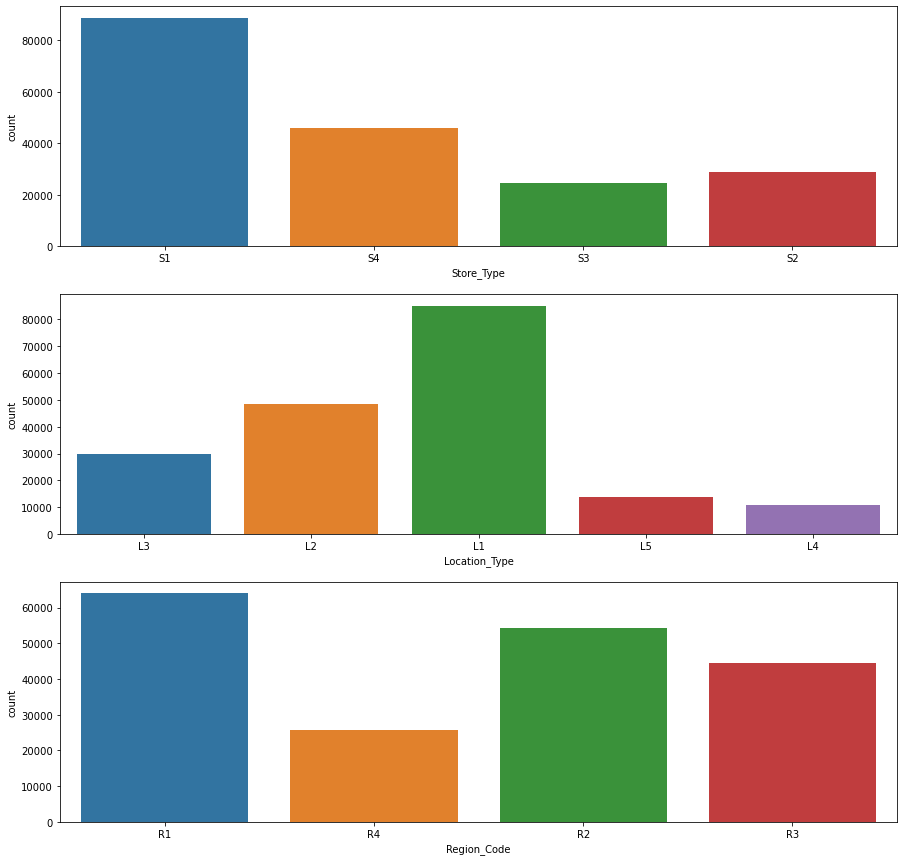

In [4]:
import warnings
warnings.filterwarnings('ignore')

non_numerical_data = df.select_dtypes(include=[np.object])
cat_data = list(non_numerical_data.columns)

fig, ax = plt.subplots(nrows=3, ncols=1, figsize = (15, 15))

# plot the count plot using countplot() for each categorical variable
for variable, subplot in zip(cat_data, ax.flatten()):
    print(variable+" :\n")
    print(df[variable].value_counts())
    sns.countplot(df[variable], ax = subplot)

# display the plot
plt.show()

#### OBSERVATIONS:

- S1 Store_Type has the highest number of counts.
- L1 Location_Type has the highest number of counts.
- R1 Region_Type has the highest number of counts.


<br>
_____________________________________________________________________________________________________________________________


# Which are the Best Stores (by number of sells)?

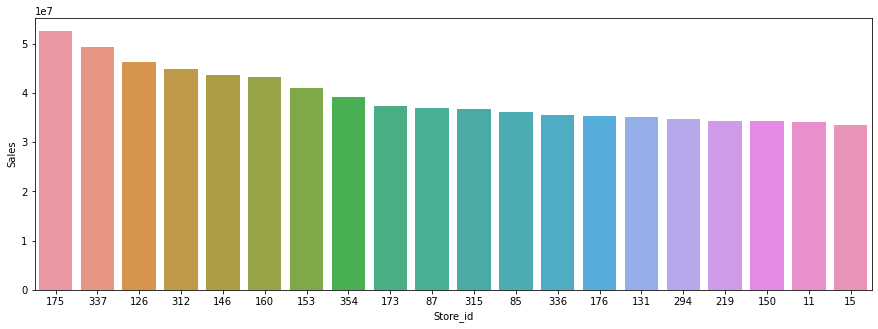

In [5]:
best_stores = df.groupby(['Store_id'], as_index=False)['Sales'].sum()         # sum sales from same store
best_stores = best_stores.sort_values('Sales', ascending = False)                # sort data
best_stores = best_stores.head(20)   


plt.figure(figsize=(15,5))
sns.barplot(best_stores['Store_id'],best_stores['Sales'],order=best_stores.sort_values('Sales',ascending=False).Store_id)
plt.show()

In [6]:
best_stores.T

,174,336,125,311,145,159,152,353,172,86,314,84,335,175,130,293,218,149,10,14
Store_id,175.00,337.00,126.00,312.00,146.00,160.00,153.00,354.00,173.00,87.00,315.00,85.00,336.0,176.0,131.00,294.00,219.0,150.00,11.00,15.00
Sales,52560255.15,49342417.92,46351830.51,44890318.23,43697690.67,43171935.06,40906471.74,39130625.88,37387163.25,36934016.67,36815851.53,36205553.67,35473797.6,35366293.2,35171306.64,34772865.12,34325395.5,34291233.18,34084541.91,33536867.64


#### OBSERVATIONS:

Store Number 175 is the higest earning store with total revenew of 52560255.15

<br>
_____________________________________________________________________________________________________________________________


# Which are the Best Stores Types (by number of sells)?

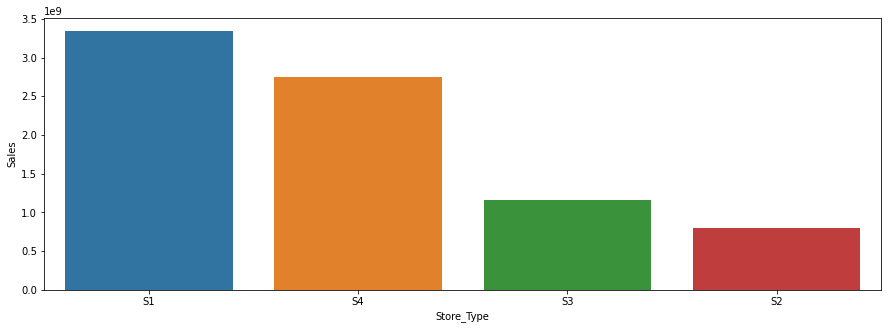

In [7]:
best_store_type = df.groupby(['Store_Type'], as_index=False)['Sales'].sum()         
best_store_type = best_store_type.sort_values('Sales', ascending = False)           
best_store_type = best_store_type.head(20)   


plt.figure(figsize=(15,5))
sns.barplot(best_store_type['Store_Type'],best_store_type['Sales'],order=best_store_type.sort_values('Sales',ascending=False).Store_Type)
plt.show()

In [8]:
best_store_type.T

,0,3,2,1
Store_Type,S1,S4,S3,S2
Sales,3343865765.910002,2752945680.450008,1165658073.389998,795530812.289999


#### OBSERVATIONS:

Despite S3 has less counts than S2... but it still generated higher revenew

<br>
_____________________________________________________________________________________________________________________________

# Which are the Best Stores Location Type (by number of sells)?

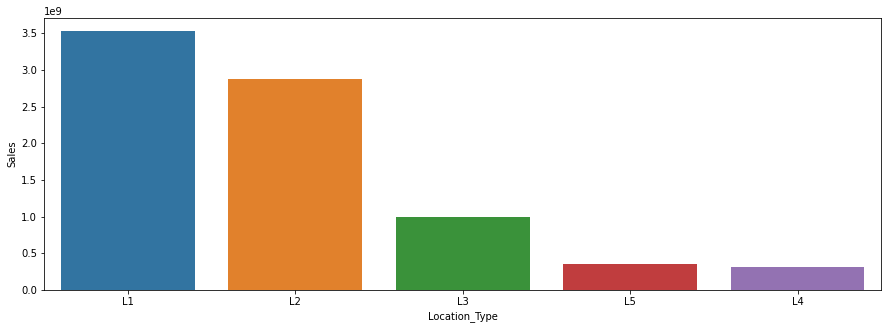

In [9]:
best_store_loc = df.groupby(['Location_Type'], as_index=False)['Sales'].sum()         
best_store_loc = best_store_loc.sort_values('Sales', ascending = False)               
best_store_loc = best_store_loc.head(20)   


plt.figure(figsize=(15,5))
sns.barplot(best_store_loc['Location_Type'],best_store_loc['Sales'],order=best_store_loc.sort_values('Sales',ascending=False).Location_Type)
plt.show()

In [10]:
best_store_loc.T

,0,1,2,4,3
Location_Type,L1,L2,L3,L5,L4
Sales,3529359324.299997,2872963724.010006,989786530.11,350916252.12,314974501.5


#### OBSERVATIONS:

No such changes more the number of store location type more the revenew.

<br>
_____________________________________________________________________________________________________________________________

# Which are the Best Stores Region (by number of sells)?

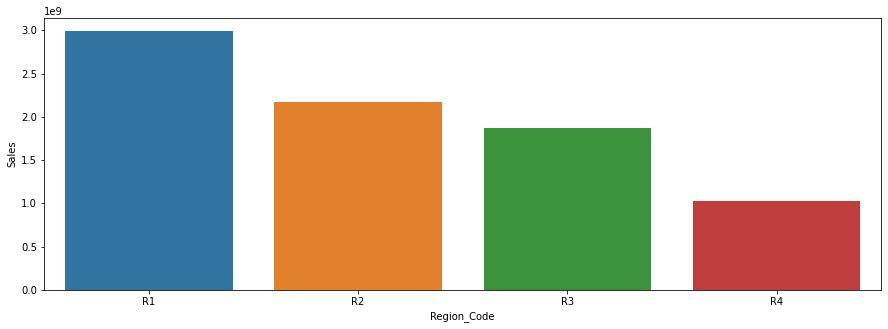

In [11]:
best_store_reg = df.groupby(['Region_Code'], as_index=False)['Sales'].sum()         
best_store_reg = best_store_reg.sort_values('Sales', ascending = False)             
best_store_reg = best_store_reg.head(20)   


plt.figure(figsize=(15,5))
sns.barplot(best_store_reg['Region_Code'],best_store_reg['Sales'],order=best_store_reg.sort_values('Sales',ascending=False).Region_Code)
plt.show()

In [12]:
best_store_reg.T

,0,1,2,3
Region_Code,R1,R2,R3,R4
Sales,2992243010.130006,2170171629.12,1870205089.170001,1025380603.619999


#### OBSERVATIONS:

No such changes more the number of store region more the revenew.

<br>
______________________________________________________________________________________________________________________________

# Best months by sells

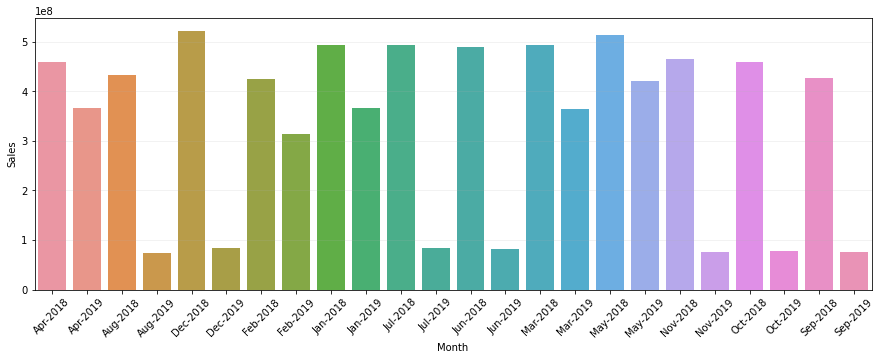

In [13]:
best_month = df.copy()
best_month['Month'] = best_month['Date'].apply(lambda x: x.strftime('%b-%Y')) 
best_month = best_month.groupby(['Month'], as_index=False)['Sales'].sum()  

plt.figure(figsize=(15,5))
plt.grid(alpha=0.2)
ax = sns.barplot(x="Month", y="Sales", data=best_month)
plt.xticks(rotation=45)
plt.show()

#### OBSERVATIONS:

We can see 2018 was quite a good year compare to 2019

<br>
_______________________________________________________________________________________________________________________________

# Checking Discount Distribution By Sales

In [14]:
discount = df.groupby(['Discount'], as_index=False)['Sales'].sum()    
discount['Discount'] = discount['Discount'].astype(str)
discount.head()

,Discount,Sales
0,No,3.891890e+09
1,Yes,4.166110e+09


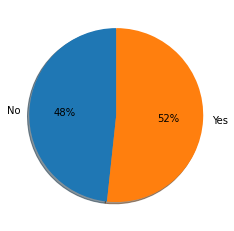

In [15]:
plt.pie(discount['Sales'], labels = discount['Discount'], autopct='%.0f%%', shadow = 'True', startangle = 90)
plt.show()

#### OBSERVATIONS:

- As we can see during discount days we got sales increase.

<br>
_____________________________________________________________________________________________________________________________

# Feature Engineering

In [16]:
df['Discount'] = df['Discount'].map({'Yes':1, 'No':0})
df[['Store_id','Holiday']] = df[['Store_id', 'Holiday']].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Store_id       188340 non-null  int32         
 1   Store_Type     188340 non-null  object        
 2   Location_Type  188340 non-null  object        
 3   Region_Code    188340 non-null  object        
 4   Date           188340 non-null  datetime64[ns]
 5   Holiday        188340 non-null  int32         
 6   Discount       188340 non-null  int64         
 7   #Order         188340 non-null  int64         
 8   Sales          188340 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int32(2), int64(2), object(3)
memory usage: 11.5+ MB


In [17]:
# Doing One Hot Encoding On Categorical Feature

data = df.copy()
data = pd.get_dummies(data, columns=['Store_Type', 'Location_Type', 'Region_Code'], drop_first=True)
data.head()

,Store_id,Date,Holiday,Discount,#Order,Sales,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Region_Code_R2,Region_Code_R3,Region_Code_R4
0,1,2018-01-01,1,1,9,7011.84,0,0,0,0,1,0,0,0,0,0
1,253,2018-01-01,1,1,60,51789.12,0,0,1,1,0,0,0,0,0,0
2,252,2018-01-01,1,1,42,36868.20,0,1,0,1,0,0,0,0,0,0
3,251,2018-01-01,1,1,23,19715.16,1,0,0,0,1,0,0,0,0,0
4,250,2018-01-01,1,1,62,45614.52,1,0,0,0,1,0,0,0,0,1


In [18]:
# Handling Date Column

data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day_of_week'] = data['Date'].dt.dayofweek
data['Weekday'] = data['Date'].dt.weekday
data['Quarter'] = data['Date'].dt.quarter

data = data.drop(['Date'], axis = 1) 

data = pd.get_dummies(data, columns=['Year'], drop_first=True, prefix='Year')
data = pd.get_dummies(data, columns=['Month'], drop_first=True, prefix='Month')
data = pd.get_dummies(data, columns=['Day_of_week'], drop_first=True, prefix='Day_of_week')
data = pd.get_dummies(data, columns=['Weekday'], drop_first=True, prefix='Weekday')
data = pd.get_dummies(data, columns=['Quarter'], drop_first=True, prefix='Quarter')

data.head()

,Store_id,Holiday,Discount,#Order,Sales,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L2,Location_Type_L3,...,Day_of_week_6,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6,Quarter_2,Quarter_3,Quarter_4
0,1,1,1,9,7011.84,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,253,1,1,60,51789.12,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,252,1,1,42,36868.20,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,251,1,1,23,19715.16,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,250,1,1,62,45614.52,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


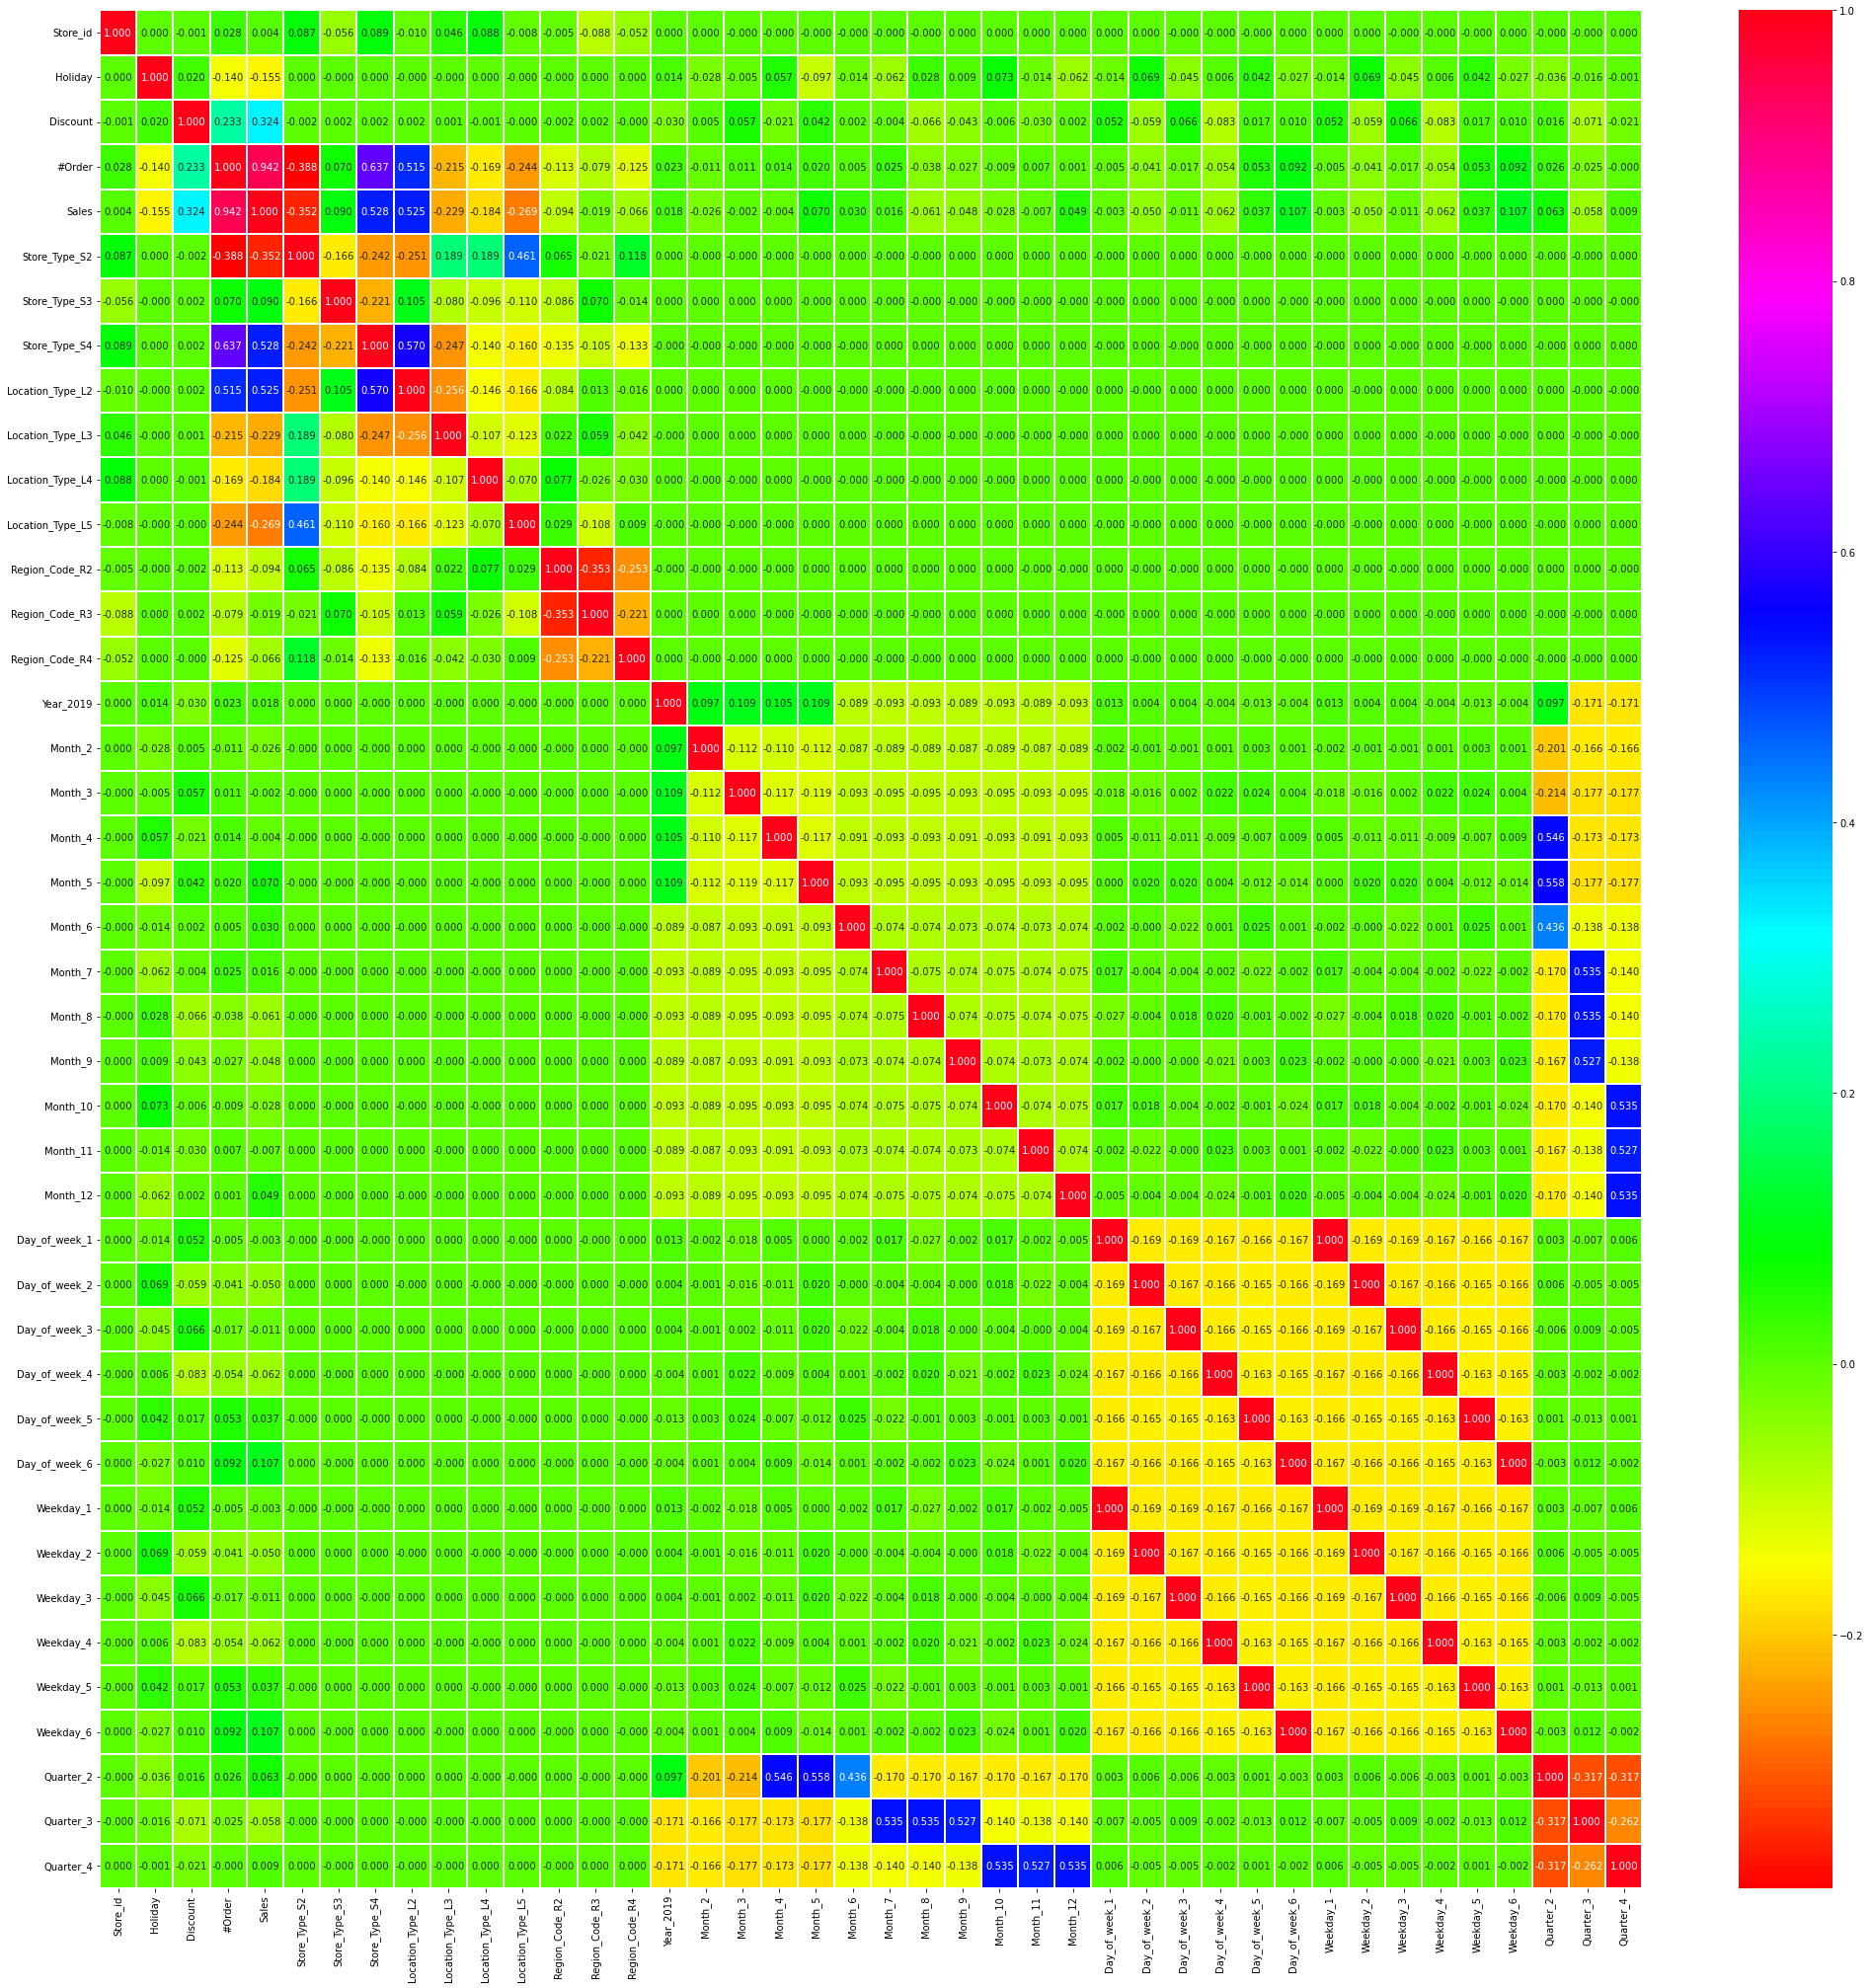

In [19]:
# Checking Correlation

plt.figure(figsize=(35,35))                                       # Help to set figure size                                     

sns.heatmap(data.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)    
    
plt.show()

<AxesSubplot:>

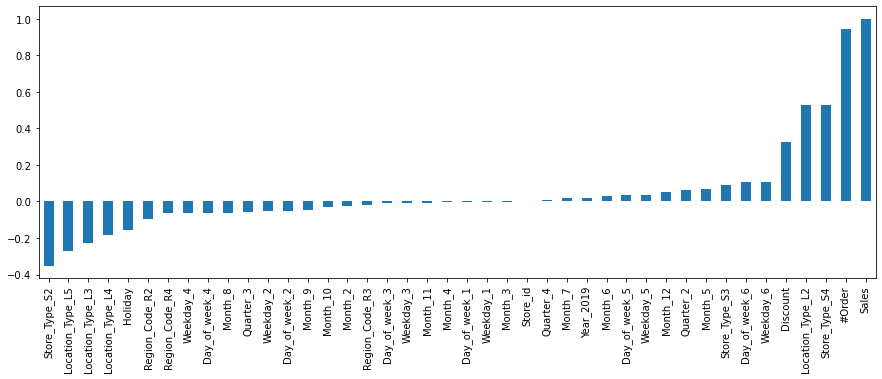

In [20]:
# Correlation Of Features with respect to sales

plt.figure(figsize=(15,5))
data.corr()['Sales'].sort_values().plot(kind='bar')

In [21]:
data.drop(['Day_of_week_3', 'Weekday_3', 'Month_11', 'Month_4',
           'Day_of_week_1', 'Weekday_1', 'Month_3', 'Store_id', 'Quarter_4'], axis=1, inplace=True)

<AxesSubplot:>

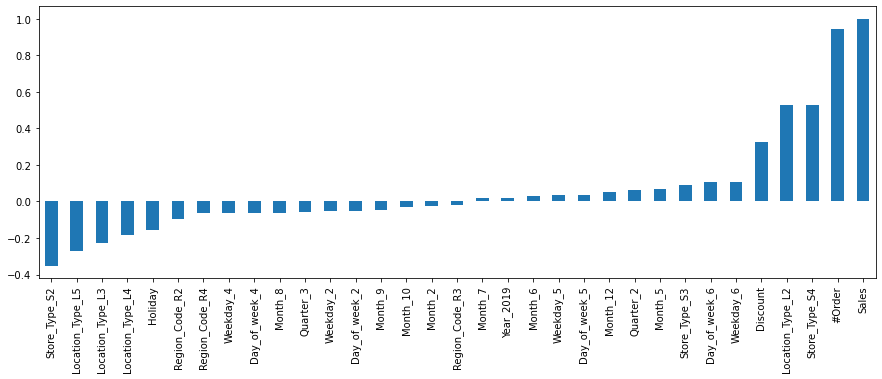

In [22]:
# Correlation Of Features with respect to sales

plt.figure(figsize=(15,5))
data.corr()['Sales'].sort_values().plot(kind='bar')

In [23]:
# Selecting (Multi-Collinear) Columns to Eliminating

def correlation(data, threshold):
    
    col_corr = set()                                      # Set of all the name of correlated elements      
    cor_mtx  = data.corr()
    
    for i in range(len(cor_mtx.columns)):
        for j in range(i):
            if abs(cor_mtx.iloc[i,j]) > threshold:       # We are interested in absolute coeff value
                colname = cor_mtx.columns[i]             # Getting the name of columns
                col_corr.add(colname)
    return col_corr

correlation(data.drop('Sales',axis=1),0.80)

{'Weekday_2', 'Weekday_4', 'Weekday_5', 'Weekday_6'}

In [24]:
data.drop(['Weekday_2', 'Weekday_4', 'Weekday_5', 'Weekday_6'],axis=1,inplace=True)

In [25]:
data

,Holiday,Discount,#Order,Sales,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L2,Location_Type_L3,Location_Type_L4,...,Month_8,Month_9,Month_10,Month_12,Day_of_week_2,Day_of_week_4,Day_of_week_5,Day_of_week_6,Quarter_2,Quarter_3
0,1,1,9,7011.84,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,60,51789.12,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,42,36868.20,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,23,19715.16,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,62,45614.52,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188335,1,1,51,37272.00,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
188336,1,0,90,54572.64,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,1,0
188337,1,0,56,31624.56,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
188338,1,1,70,49162.41,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [26]:
# Feature Generation

data['Discount_and_Holiday'] = data['Holiday'] * data['Discount']
data

,Holiday,Discount,#Order,Sales,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L2,Location_Type_L3,Location_Type_L4,...,Month_9,Month_10,Month_12,Day_of_week_2,Day_of_week_4,Day_of_week_5,Day_of_week_6,Quarter_2,Quarter_3,Discount_and_Holiday
0,1,1,9,7011.84,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,60,51789.12,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,1,42,36868.20,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,23,19715.16,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,1,62,45614.52,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188335,1,1,51,37272.00,1,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,1
188336,1,0,90,54572.64,0,0,1,1,0,0,...,0,0,0,0,1,0,0,1,0,0
188337,1,0,56,31624.56,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
188338,1,1,70,49162.41,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1


<AxesSubplot:>

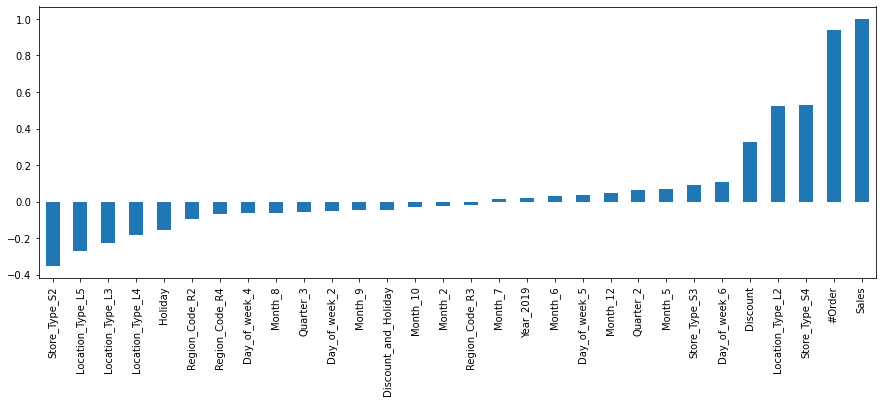

In [27]:
# Correlation Of Features with respect to sales

plt.figure(figsize=(15,5))
data.corr()['Sales'].sort_values().plot(kind='bar')

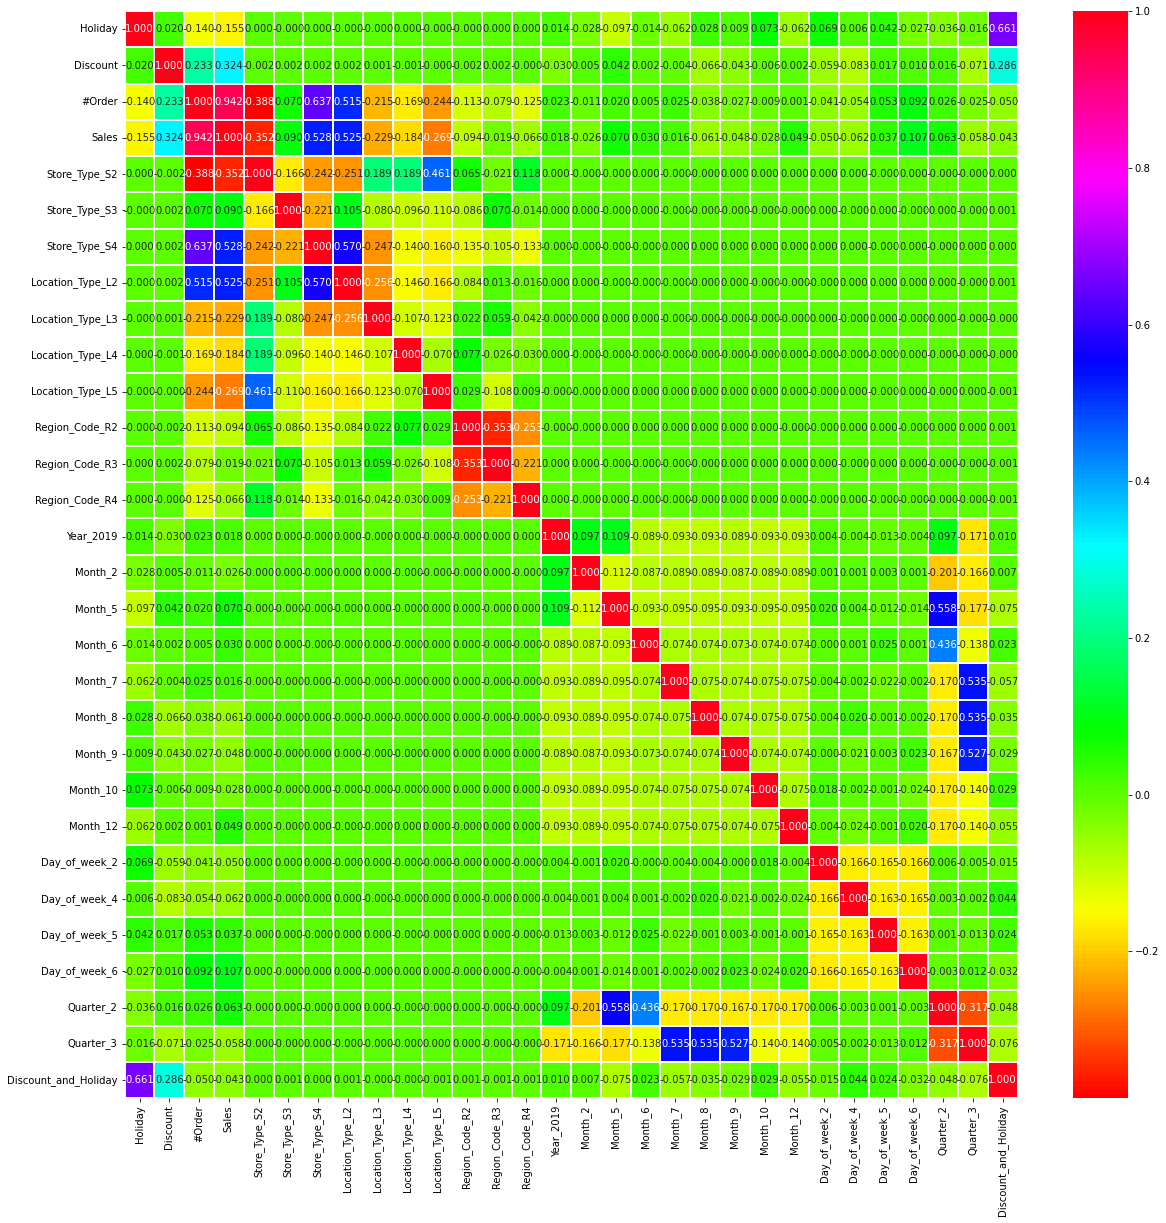

In [28]:
# Checking Correlation

plt.figure(figsize=(20,20))                                       # Help to set figure size                                     

sns.heatmap(data.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)    
    
plt.show()

In [29]:
# Selecting (Multi-Collinear) Columns to Eliminating

def correlation(data, threshold):
    
    col_corr = set()                                      # Set of all the name of correlated elements      
    cor_mtx  = data.corr()
    
    for i in range(len(cor_mtx.columns)):
        for j in range(i):
            if abs(cor_mtx.iloc[i,j]) > threshold:       # We are interested in absolute coeff value
                colname = cor_mtx.columns[i]             # Getting the name of columns
                col_corr.add(colname)
    return col_corr

correlation(data.drop('Sales',axis=1),0.80)

set()

<br>
_____________________________________________________________________________________________________________________________

# Outliers Detections

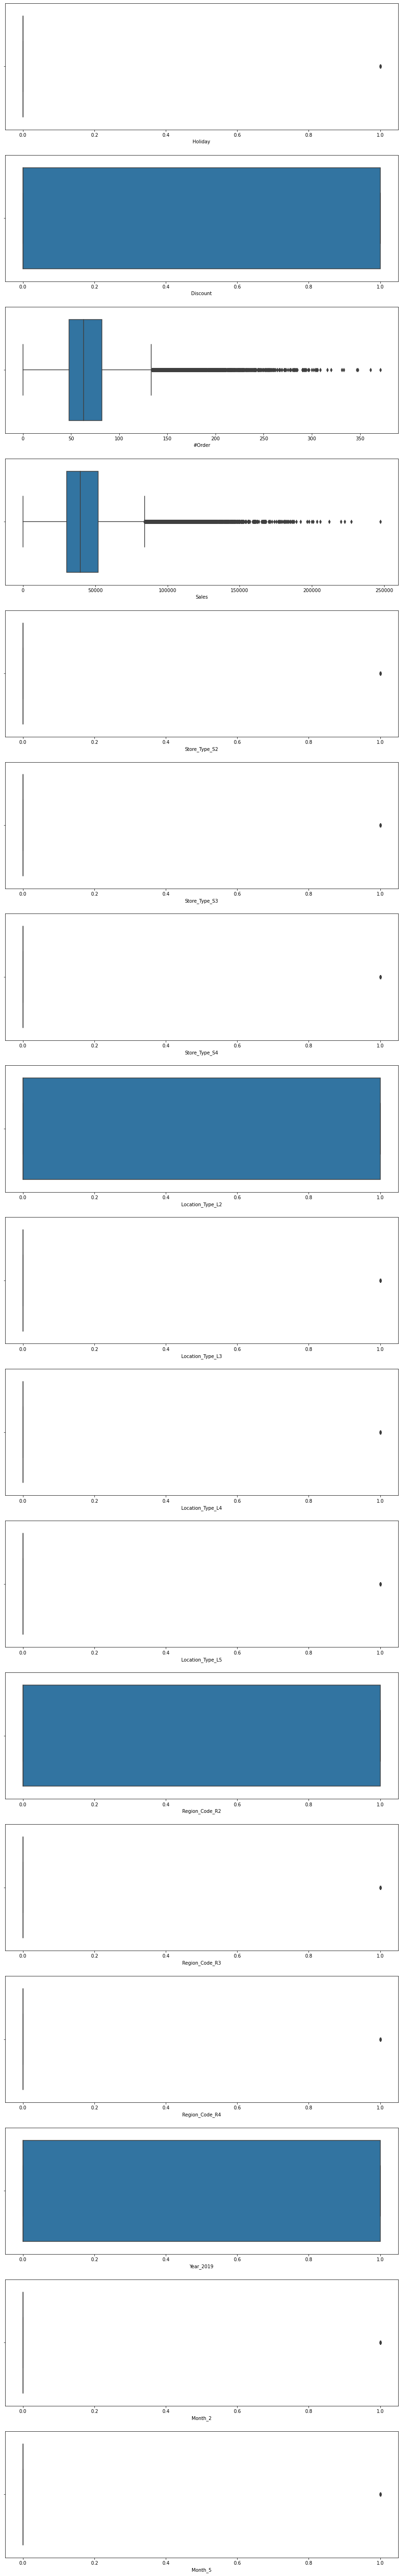

In [30]:
numerical_data = data.select_dtypes(include=[np.number])
num_data = list(numerical_data.columns)

fig, ax = plt.subplots(nrows=17, ncols=1, figsize = (15, 100))

# plot the count plot using countplot() for each categorical variable
for variable, subplot in zip(num_data, ax.flatten()):
    sns.boxplot(data[variable], ax = subplot)

# display the plot
plt.show()

In [31]:
# Deleting Outliers

# Dealing with the outliers
q1 = data['Sales'].quantile(0.25)
q3 = data['Sales'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
med = np.median(data['Sales'])
for i in data['Sales']:
    if i > Upper_tail or i < Lower_tail:
            data['Sales'] = data['Sales'].replace(i, med)

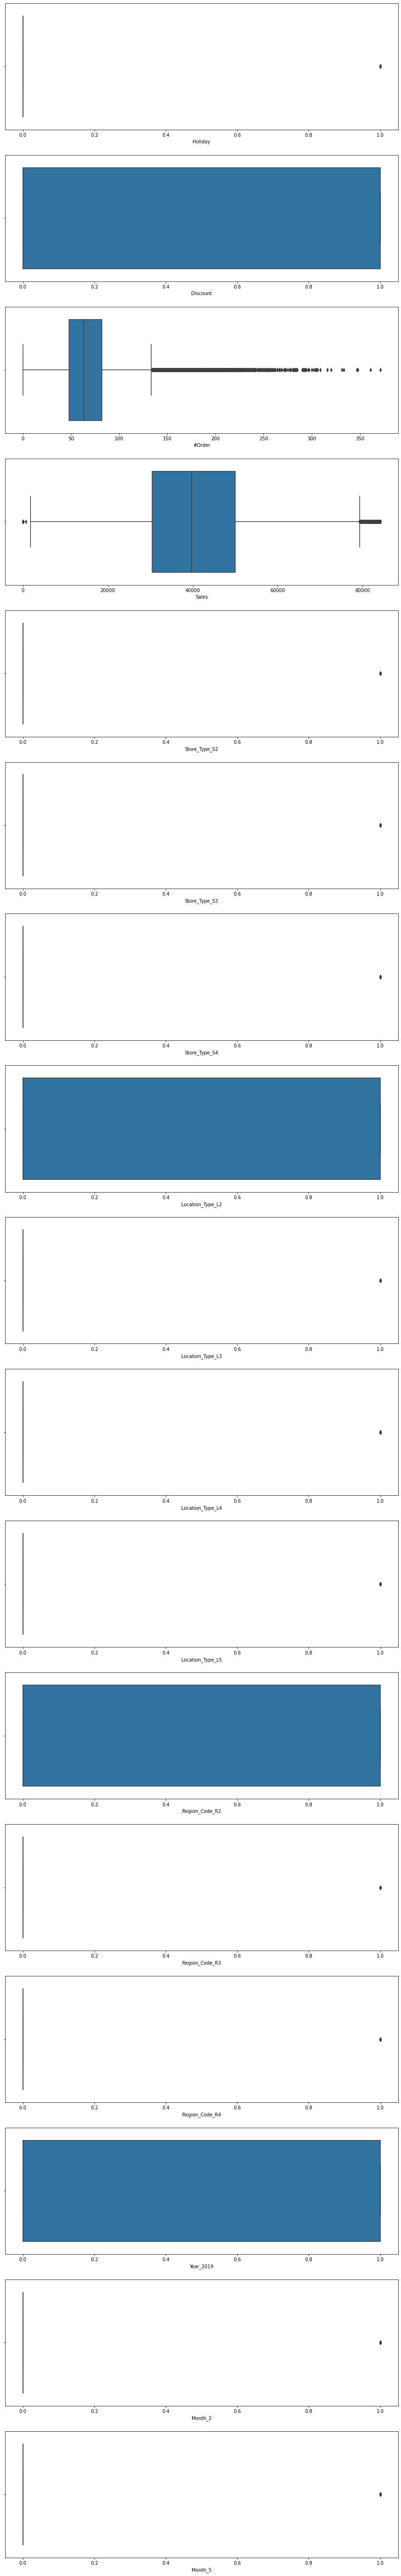

In [32]:
numerical_data = data.select_dtypes(include=[np.number])
num_data = list(numerical_data.columns)

fig, ax = plt.subplots(nrows=17, ncols=1, figsize = (15, 100))

# plot the count plot using countplot() for each categorical variable
for variable, subplot in zip(num_data, ax.flatten()):
    sns.boxplot(data[variable], ax = subplot)

# display the plot
plt.show()

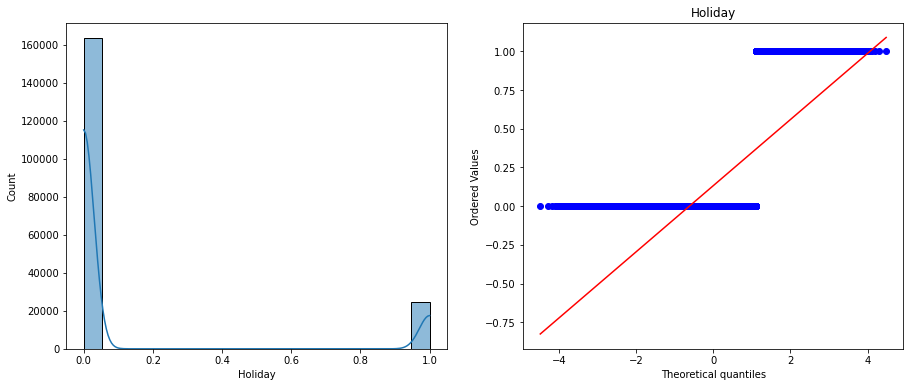

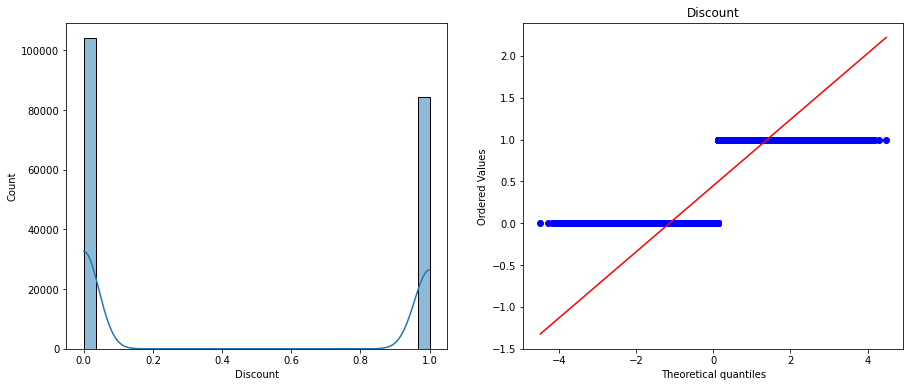

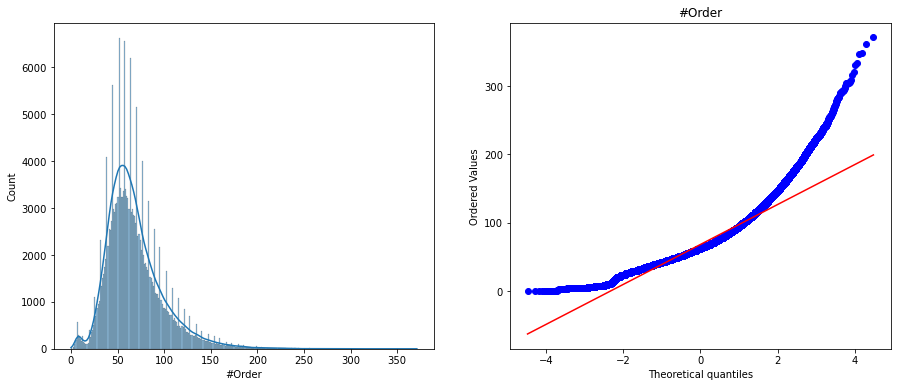

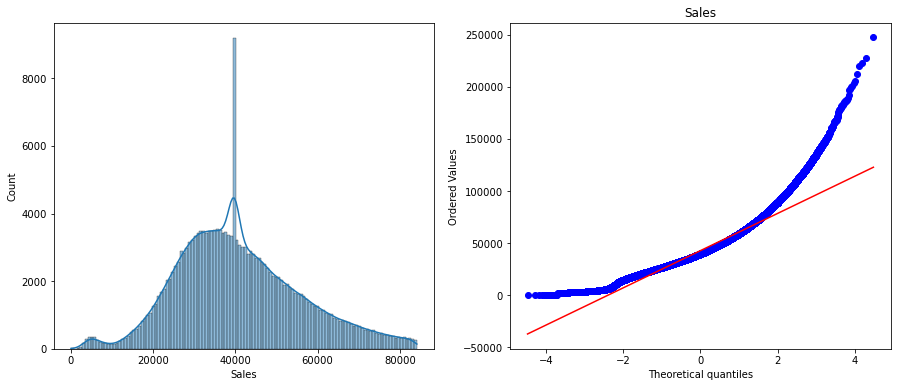

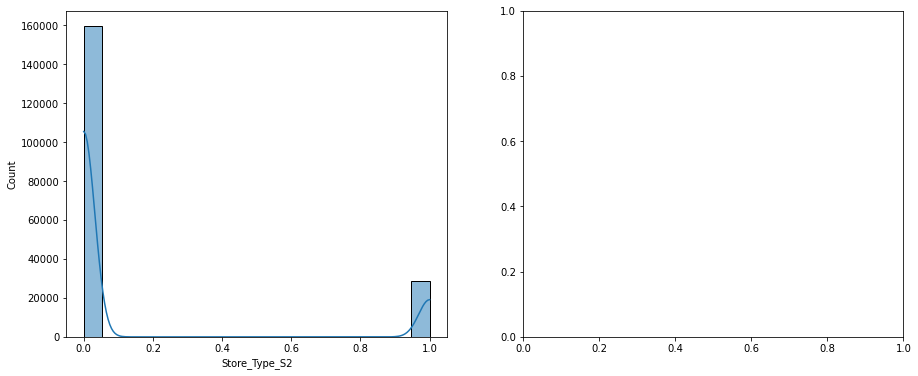

In [33]:
# Checking Distribution Of The Data

import pylab
import scipy.stats as stats

def diagonisticPlots(data, feature):
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    sns.histplot(data[feature], kde= True)
    
    plt.subplot(1,2,2)
    stats.probplot(df[i], dist='norm', plot=pylab)
    plt.title(i)
    pylab.show()
    

df_copy1 = data.copy()

numerical_data = df_copy1.select_dtypes(include = [np.number]).columns

all_numerical_data = df_copy1[numerical_data]
   
try:
    for i in all_numerical_data:
        diagonisticPlots(df_copy1,i)
except:
    pass

In [34]:
# Splitting Data & Feature Selection

from sklearn.model_selection import train_test_split

X = data.drop('Sales',axis=1)
y = data.Sales

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [35]:
# Feature Selection Using Random Forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

rf = RandomForestRegressor()

# Train the classifier
rf.fit(X_train, y_train)


feat_labels = X.columns

values = []

# Print the name and gini importance of each feature
for feature in zip(feat_labels, rf.feature_importances_):
    values.append(feature)
#     print(feature)

def SortMyVal(sub_li):
    sub_li.sort(key = lambda x: x[1],reverse=True)
    return sub_li

SortMyVal(values)

[('#Order', 0.8505127587516114),
 ('Discount', 0.01761445565248719),
 ('Location_Type_L2', 0.014001394401242552),
 ('Year_2019', 0.009205970131055905),
 ('Store_Type_S4', 0.009119401222685685),
 ('Day_of_week_5', 0.00711311206115832),
 ('Day_of_week_6', 0.006581344476461277),
 ('Region_Code_R2', 0.006326848964766512),
 ('Month_12', 0.005815642364450973),
 ('Region_Code_R3', 0.005623331883441217),
 ('Month_5', 0.005321056523083897),
 ('Holiday', 0.005248358022319564),
 ('Day_of_week_4', 0.005230339802168903),
 ('Day_of_week_2', 0.004999694664731973),
 ('Quarter_2', 0.004666389730693453),
 ('Region_Code_R4', 0.004645853217812017),
 ('Month_6', 0.004184834958421353),
 ('Location_Type_L3', 0.0038764770430592924),
 ('Store_Type_S3', 0.00378793603974957),
 ('Location_Type_L5', 0.0035920474837891326),
 ('Month_2', 0.003431819543638965),
 ('Store_Type_S2', 0.0031942020360601394),
 ('Month_10', 0.003133515904606222),
 ('Quarter_3', 0.0029348033481657572),
 ('Location_Type_L4', 0.002526699036029

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train,y_train)

RandomForestRegressor()

In [38]:
model.predict(X_test)

array([26335.43722286, 50755.006     , 36209.80893   , ...,
       36078.9005    , 40965.14382857, 21450.71508571])

In [39]:
y_pred = model.predict(X_test)

from sklearn import metrics

mean_sq_err = metrics.mean_squared_error(y_test,y_pred)
mean_sq_err

30280125.111879963

In [40]:
RMSE = np.sqrt(mean_sq_err)
RMSE

5502.737965038856

In [41]:
model.score(X_test,y_test)

0.8665931338178494

In [42]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
r2_score(y_test,y_pred)

0.8665931338178494

In [43]:
value = pd.DataFrame({"Actual":y_test, "Predicted":y_pred})
value

,Actual,Predicted
105668,24753.60,26335.437223
162895,47250.00,50755.006000
112864,41183.28,36209.808930
29181,41166.00,42932.674519
61249,50592.00,41499.230000
...,...,...
110233,52095.00,55704.929686
185972,37680.00,35216.718900
136925,38685.00,36078.900500
3059,47007.00,40965.143829


In [44]:
import xgboost as xgb

model2 = xgb.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model2.fit(X_train,y_train)

preds = model2.predict(X_test)

rmse = np.sqrt(metrics.mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 5164.343246


In [45]:
model2.score(X_test,y_test)

0.8824965233329602

In [46]:
from sklearn.metrics import r2_score

y_pred = model2.predict(X_test)
r2_score(y_test,y_pred)

0.8824965233329602

In [47]:
value = pd.DataFrame({"Actual":y_test, "Predicted":y_pred})
value

,Actual,Predicted
105668,24753.60,27932.009766
162895,47250.00,53620.773438
112864,41183.28,36925.195312
29181,41166.00,41560.921875
61249,50592.00,46135.597656
...,...,...
110233,52095.00,52550.218750
185972,37680.00,34735.890625
136925,38685.00,35700.660156
3059,47007.00,40162.011719


<br>
______________________________________________________________________________________________________________________________

In [48]:
df

,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,1,S1,L3,R1,2018-01-01,1,1,9,7011.84
1,253,S4,L2,R1,2018-01-01,1,1,60,51789.12
2,252,S3,L2,R1,2018-01-01,1,1,42,36868.20
3,251,S2,L3,R1,2018-01-01,1,1,23,19715.16
4,250,S2,L3,R4,2018-01-01,1,1,62,45614.52
...,...,...,...,...,...,...,...,...,...
188335,149,S2,L3,R2,2019-05-31,1,1,51,37272.00
188336,153,S4,L2,R1,2019-05-31,1,0,90,54572.64
188337,154,S1,L3,R2,2019-05-31,1,0,56,31624.56
188338,155,S3,L1,R2,2019-05-31,1,1,70,49162.41


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Store_id       188340 non-null  int32         
 1   Store_Type     188340 non-null  object        
 2   Location_Type  188340 non-null  object        
 3   Region_Code    188340 non-null  object        
 4   Date           188340 non-null  datetime64[ns]
 5   Holiday        188340 non-null  int32         
 6   Discount       188340 non-null  int64         
 7   #Order         188340 non-null  int64         
 8   Sales          188340 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int32(2), int64(2), object(3)
memory usage: 11.5+ MB


In [50]:
data2 = df.copy()

data2['Year'] = data2['Date'].dt.year
data2['Month'] = data2['Date'].dt.month
data2['Day'] = data2['Date'].dt.day

data2

,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,Year,Month,Day
0,1,S1,L3,R1,2018-01-01,1,1,9,7011.84,2018,1,1
1,253,S4,L2,R1,2018-01-01,1,1,60,51789.12,2018,1,1
2,252,S3,L2,R1,2018-01-01,1,1,42,36868.20,2018,1,1
3,251,S2,L3,R1,2018-01-01,1,1,23,19715.16,2018,1,1
4,250,S2,L3,R4,2018-01-01,1,1,62,45614.52,2018,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
188335,149,S2,L3,R2,2019-05-31,1,1,51,37272.00,2019,5,31
188336,153,S4,L2,R1,2019-05-31,1,0,90,54572.64,2019,5,31
188337,154,S1,L3,R2,2019-05-31,1,0,56,31624.56,2019,5,31
188338,155,S3,L1,R2,2019-05-31,1,1,70,49162.41,2019,5,31


In [51]:
data2.drop('Store_id',axis=1, inplace=True)

In [52]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Store_Type     188340 non-null  object        
 1   Location_Type  188340 non-null  object        
 2   Region_Code    188340 non-null  object        
 3   Date           188340 non-null  datetime64[ns]
 4   Holiday        188340 non-null  int32         
 5   Discount       188340 non-null  int64         
 6   #Order         188340 non-null  int64         
 7   Sales          188340 non-null  float64       
 8   Year           188340 non-null  int64         
 9   Month          188340 non-null  int64         
 10  Day            188340 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(5), object(3)
memory usage: 15.1+ MB


In [53]:
data2['Month'].value_counts()

1     20075
3     20075
5     20075
4     19345
2     17885
7     13140
8     13140
10    13140
12    13140
6     12775
9     12775
11    12775
Name: Month, dtype: int64

In [54]:
data2

,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,Year,Month,Day
0,S1,L3,R1,2018-01-01,1,1,9,7011.84,2018,1,1
1,S4,L2,R1,2018-01-01,1,1,60,51789.12,2018,1,1
2,S3,L2,R1,2018-01-01,1,1,42,36868.20,2018,1,1
3,S2,L3,R1,2018-01-01,1,1,23,19715.16,2018,1,1
4,S2,L3,R4,2018-01-01,1,1,62,45614.52,2018,1,1
...,...,...,...,...,...,...,...,...,...,...,...
188335,S2,L3,R2,2019-05-31,1,1,51,37272.00,2019,5,31
188336,S4,L2,R1,2019-05-31,1,0,90,54572.64,2019,5,31
188337,S1,L3,R2,2019-05-31,1,0,56,31624.56,2019,5,31
188338,S3,L1,R2,2019-05-31,1,1,70,49162.41,2019,5,31


In [55]:
data2[['Store_Type', 'Location_Type', 'Region_Code']] = data2[['Store_Type', 'Location_Type', 'Region_Code']].astype('category')
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Store_Type     188340 non-null  category      
 1   Location_Type  188340 non-null  category      
 2   Region_Code    188340 non-null  category      
 3   Date           188340 non-null  datetime64[ns]
 4   Holiday        188340 non-null  int32         
 5   Discount       188340 non-null  int64         
 6   #Order         188340 non-null  int64         
 7   Sales          188340 non-null  float64       
 8   Year           188340 non-null  int64         
 9   Month          188340 non-null  int64         
 10  Day            188340 non-null  int64         
dtypes: category(3), datetime64[ns](1), float64(1), int32(1), int64(5)
memory usage: 11.3 MB


In [56]:
data2 = pd.get_dummies(data2, columns=['Store_Type', 'Location_Type', 'Region_Code'], drop_first=True)
data2

,Date,Holiday,Discount,#Order,Sales,Year,Month,Day,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Region_Code_R2,Region_Code_R3,Region_Code_R4
0,2018-01-01,1,1,9,7011.84,2018,1,1,0,0,0,0,1,0,0,0,0,0
1,2018-01-01,1,1,60,51789.12,2018,1,1,0,0,1,1,0,0,0,0,0,0
2,2018-01-01,1,1,42,36868.20,2018,1,1,0,1,0,1,0,0,0,0,0,0
3,2018-01-01,1,1,23,19715.16,2018,1,1,1,0,0,0,1,0,0,0,0,0
4,2018-01-01,1,1,62,45614.52,2018,1,1,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188335,2019-05-31,1,1,51,37272.00,2019,5,31,1,0,0,0,1,0,0,1,0,0
188336,2019-05-31,1,0,90,54572.64,2019,5,31,0,0,1,1,0,0,0,0,0,0
188337,2019-05-31,1,0,56,31624.56,2019,5,31,0,0,0,0,1,0,0,1,0,0
188338,2019-05-31,1,1,70,49162.41,2019,5,31,0,1,0,0,0,0,0,1,0,0


In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

X = data2.drop(['Sales','Year'],axis=1)
y = data2['Sales']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [58]:
feat_labels = X.columns

values = []

# Print the name and gini importance of each feature
for feature in zip(feat_labels, rf.feature_importances_):
    values.append(feature)
#     print(feature)

def SortMyVal(sub_li):
    sub_li.sort(key = lambda x: x[1],reverse=True)
    return sub_li

SortMyVal(values)

[('Discount', 0.8505127587516114),
 ('Holiday', 0.01761445565248719),
 ('Store_Type_S2', 0.014001394401242552),
 ('Region_Code_R2', 0.009205970131055905),
 ('Day', 0.009119401222685685),
 ('Location_Type_L3', 0.006326848964766512),
 ('Location_Type_L4', 0.005623331883441217),
 ('Region_Code_R4', 0.005321056523083897),
 ('Date', 0.005248358022319564),
 ('Location_Type_L5', 0.004645853217812017),
 ('Store_Type_S3', 0.0038764770430592924),
 ('Month', 0.00378793603974957),
 ('Location_Type_L2', 0.0035920474837891326),
 ('Region_Code_R3', 0.003431819543638965),
 ('#Order', 0.0031942020360601394),
 ('Store_Type_S4', 0.002526699036029728)]

In [59]:
data2.drop('Date',axis=1, inplace=True)
X = data2.drop(['Sales','Year'],axis=1)
y = data2.Sales

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [60]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train,y_train)

RandomForestRegressor()

In [61]:
model.predict(X_test)

array([72276.6385    , 49107.426675  , 22378.71      , ...,
       27723.7479    , 32495.36328571, 30710.9475    ])

In [62]:
y_pred = model.predict(X_test)

from sklearn import metrics

mean_sq_err = metrics.mean_squared_error(y_test,y_pred)
mean_sq_err

13499611.576796198

In [63]:
RMSE = np.sqrt(mean_sq_err)
RMSE

3674.181756091579

In [64]:
model.score(X_test,y_test)

0.9607163735740196

In [65]:
from sklearn.model_selection import cross_val_score
score_val = cross_val_score(model,X,y,cv=5)
print(score_val)

score_val.mean()

[0.94217327 0.94224113 0.93420979 0.91301053 0.94784086]


0.9358951166017031

In [66]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
r2_score(y_test,y_pred)

0.9607163735740196

### Obervations:

RandomForestRegressor cross-value-score is 93 and test-value 96 soo we can say that our model isn't over fitted.

In [82]:
0.9607163735740196 - 0.9358951166017031

0.02482125697231652

In [68]:
value = pd.DataFrame({"Actual":y_test, "Predicted":y_pred})
value

,Actual,Predicted
186189,65484.00,72276.638500
151910,49449.00,49107.426675
139669,21654.00,22378.710000
90023,52197.00,54073.106500
137493,112815.00,102243.665400
...,...,...
183307,31473.09,34855.421710
78975,43113.00,39083.670000
30443,27362.58,27723.747900
166165,32790.00,32495.363286


<br>
_____________________________________________________________________________________________________________________________

In [69]:
import xgboost as xgb

model2 = xgb.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model2.fit(X_train,y_train)

preds = model2.predict(X_test)

rmse = np.sqrt(metrics.mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 3094.666134


In [70]:
from sklearn.model_selection import cross_val_score
score_val = cross_val_score(model2,X,y,cv=5)
print(score_val)

score_val.mean()

[0.94240529 0.94315008 0.95025957 0.91739623 0.95969154]


0.9425805405114602

In [71]:
model2.score(X_test,y_test)

0.9721312234031988

In [81]:
0.9721312234031988 - 0.9425805405114602

0.029550682891738567

In [73]:
from sklearn.metrics import r2_score

y_pred = model2.predict(X_test)
r2_score(y_test,y_pred)

0.9721312234031988

In [74]:
value = pd.DataFrame({"Actual":y_test, "Predicted":y_pred})
value

,Actual,Predicted
186189,65484.00,71770.351562
151910,49449.00,47924.582031
139669,21654.00,21926.021484
90023,52197.00,51397.234375
137493,112815.00,107440.781250
...,...,...
183307,31473.09,32041.482422
78975,43113.00,39121.078125
30443,27362.58,29872.546875
166165,32790.00,33283.816406


### Obervations:

XGBoostRegression cross-value-score is 94 and test-value 97 soo we can say that our model isn't over fitted.😅

In [75]:
data2

,Holiday,Discount,#Order,Sales,Year,Month,Day,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Region_Code_R2,Region_Code_R3,Region_Code_R4
0,1,1,9,7011.84,2018,1,1,0,0,0,0,1,0,0,0,0,0
1,1,1,60,51789.12,2018,1,1,0,0,1,1,0,0,0,0,0,0
2,1,1,42,36868.20,2018,1,1,0,1,0,1,0,0,0,0,0,0
3,1,1,23,19715.16,2018,1,1,1,0,0,0,1,0,0,0,0,0
4,1,1,62,45614.52,2018,1,1,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188335,1,1,51,37272.00,2019,5,31,1,0,0,0,1,0,0,1,0,0
188336,1,0,90,54572.64,2019,5,31,0,0,1,1,0,0,0,0,0,0
188337,1,0,56,31624.56,2019,5,31,0,0,0,0,1,0,0,1,0,0
188338,1,1,70,49162.41,2019,5,31,0,1,0,0,0,0,0,1,0,0


In [76]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Holiday           188340 non-null  int32  
 1   Discount          188340 non-null  int64  
 2   #Order            188340 non-null  int64  
 3   Sales             188340 non-null  float64
 4   Year              188340 non-null  int64  
 5   Month             188340 non-null  int64  
 6   Day               188340 non-null  int64  
 7   Store_Type_S2     188340 non-null  uint8  
 8   Store_Type_S3     188340 non-null  uint8  
 9   Store_Type_S4     188340 non-null  uint8  
 10  Location_Type_L2  188340 non-null  uint8  
 11  Location_Type_L3  188340 non-null  uint8  
 12  Location_Type_L4  188340 non-null  uint8  
 13  Location_Type_L5  188340 non-null  uint8  
 14  Region_Code_R2    188340 non-null  uint8  
 15  Region_Code_R3    188340 non-null  uint8  
 16  Region_Code_R4    18

In [77]:
import joblib
joblib.dump(model2,"Sales_Prediction.pkl")

['Sales_Prediction.pkl']

In [78]:
import joblib
m = joblib.load('Sales_Prediction.pkl')

In [79]:
data2.iloc[155]

Holiday                 1.0
Discount                1.0
#Order                 41.0
Sales               31630.8
Year                 2018.0
Month                   1.0
Day                     1.0
Store_Type_S2           1.0
Store_Type_S3           0.0
Store_Type_S4           0.0
Location_Type_L2        0.0
Location_Type_L3        1.0
Location_Type_L4        0.0
Location_Type_L5        0.0
Region_Code_R2          0.0
Region_Code_R3          0.0
Region_Code_R4          1.0
Name: 155, dtype: float64

In [80]:
lst = np.array([[1.0,1.0,41.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0]])
m.predict(lst)

array([32759.61], dtype=float32)